# Missing Data
To deal with missing data we must first understand how much data is missing and in what variables.
The worst variables are:
- Workoverload (1087 missing values : 70.27%)
- Working_ability (1042 missing values : 67.36%)
- Trauma (680 missing values : 43.96%)
- Relationship_with_colleagues (567 missing values : 36.65%)

We also have 2 other variables with high percentage of missing data, but these are low enough that imputation can be considered
- Inccordination (230 missing values : 14.87%)
- Irrational_Thoughts_Work (183 missing values : 11.83%)

All other variables have 0 or lower percentage of missing data, as such they are good candidates for imputation.

For each of the first 4 variables we must consider if it's worth to keep or delete the variable from our study

In [2]:
# Import libraries
import pandas as pd # needed for most operation
import numpy as np # needed for some array operations
from matplotlib import pyplot as plt #used for plots
import seaborn as sns
from importlib import reload

In [5]:
# Fetch Data
data = pd.read_csv('../data/RA_data.csv')
data.describe()
#data.head()

,Treatment,Fever,Duration_of_pain,Sick_leave,Earlier_hospitalization,Workoverload,Familiy_history,Depression,Extremely_nervous,Stress,...,Failure_symptoms,Incoordination,neck_pain_intensity,low_back_pain_intensity,arm_left_pain_intensity,arm_right_pain_intensity,leg_left_pain_intensity,leg_right_pain_intensity,working_ability,Paidwork
count,1546.000000,1512.00000,1515.000000,1546.000000,1546.000000,459.000000,1546.000000,1546.000000,1494.000000,1546.000000,...,1546.000000,1316.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,504.000000,1546.000000
mean,2.891979,0.27381,9.193399,0.301423,0.692109,0.400871,0.256792,0.093790,3.113119,0.774256,...,0.892626,0.386018,1.596378,6.523933,0.706339,0.716041,2.805304,2.785899,4.696429,0.328590
std,1.867272,0.44606,1.521821,0.459024,0.461771,0.490610,0.437005,0.291631,3.058689,0.418207,...,0.309688,0.487020,2.764563,2.532330,1.967483,1.996168,3.454409,3.468595,2.632778,0.469853
min,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.00000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,2.000000,0.00000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,...,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,5.000000,1.00000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000,1.000000,...,1.000000,1.000000,3.000000,8.000000,0.000000,0.000000,6.000000,6.000000,7.000000,1.000000
max,5.000000,1.00000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,...,1.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


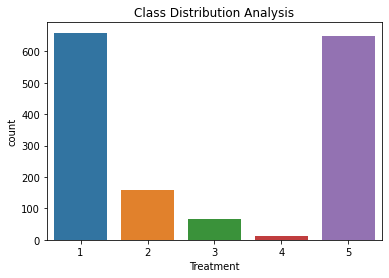

In [4]:
# Analyse class distribution
sns.countplot(x='Treatment',data = data)
plt.title('Class Distribution Analysis')
plt.show()

# We have class imbalance in our data, with treatment options 1 and 5 being a lot more used than 2, 3 and 4

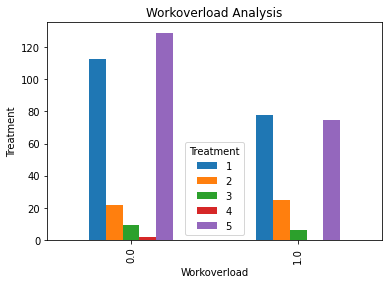

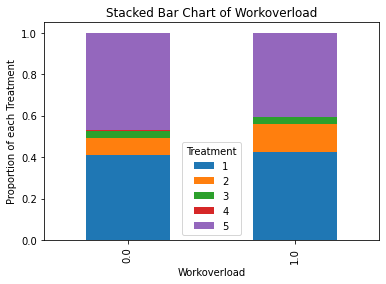

In [5]:
# Analysis for Workoverload
crosstab = pd.crosstab(data.Workoverload,data.Treatment).plot(kind='bar')
plt.title('Workoverload Analysis')
plt.xlabel('Workoverload')
plt.ylabel('Treatment')
plt.show()

table=pd.crosstab(data.Workoverload,data.Treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Workoverload')
plt.ylabel('Proportion of each Treatment')
plt.show()

# Given that there are a lot of missing values in this variable
# We'll drop this variable from our data

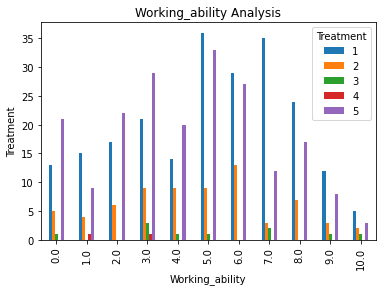

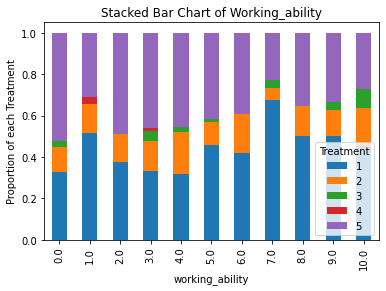

In [6]:
# Analysis for Working Ability
crosstab = pd.crosstab(data.working_ability,data.Treatment).plot(kind='bar')
plt.title('Working_ability Analysis')
plt.xlabel('Working_ability')
plt.ylabel('Treatment')
plt.show()

table=pd.crosstab(data.working_ability,data.Treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Working_ability')
plt.ylabel('Proportion of each Treatment')
plt.show()

# Given that there are a lot of missing values in this variable
# We'll drop this variable from our data

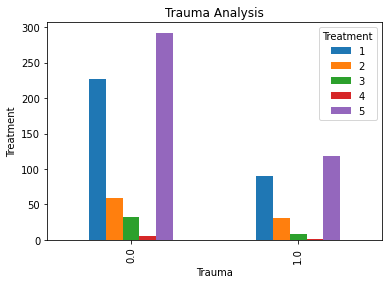

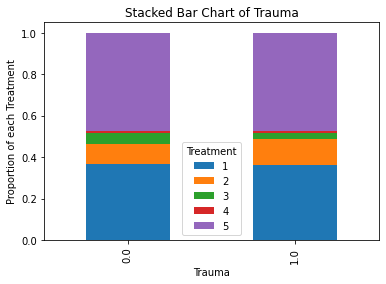

In [7]:
# Analysis for Trauma
crosstab = pd.crosstab(data.Trauma,data.Treatment).plot(kind='bar')
plt.title('Trauma Analysis')
plt.xlabel('Trauma')
plt.ylabel('Treatment')
plt.show()

table=pd.crosstab(data.Trauma,data.Treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Trauma')
plt.ylabel('Proportion of each Treatment')
plt.show()

# Given that there are a lot of missing values in this variable
# We'll drop this variable from our data

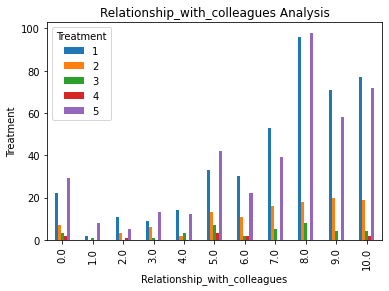

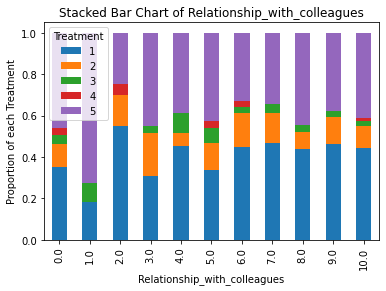

In [8]:
# Analysis for Relationship with colleagues
crosstab = pd.crosstab(data.Relationship_with_colleagues,data.Treatment).plot(kind='bar')
plt.title('Relationship_with_colleagues Analysis')
plt.xlabel('Relationship_with_colleagues')
plt.ylabel('Treatment')
plt.show()

table=pd.crosstab(data.Relationship_with_colleagues,data.Treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Relationship_with_colleagues')
plt.ylabel('Proportion of each Treatment')
plt.show()

# Given that there are a lot of missing values in this variable
# We'll drop this variable from our data

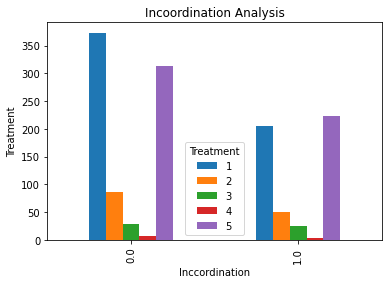

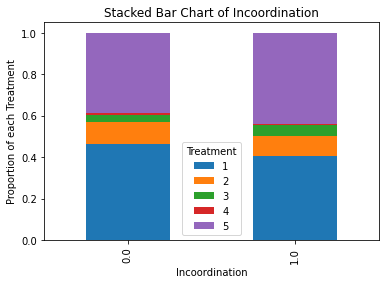

In [23]:
# Analysis for Incoordination
crosstab = pd.crosstab(data.Incoordination,data.Treatment).plot(kind='bar')
plt.title('Incoordination Analysis')
plt.xlabel('Inccordination')
plt.ylabel('Treatment')
plt.show()

table=pd.crosstab(data.Incoordination,data.Treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Incoordination')
plt.ylabel('Proportion of each Treatment')
plt.show()

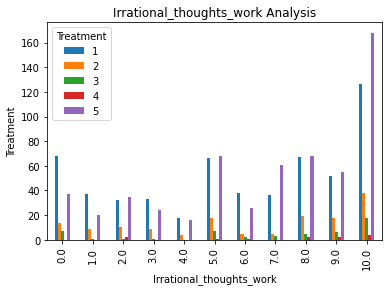

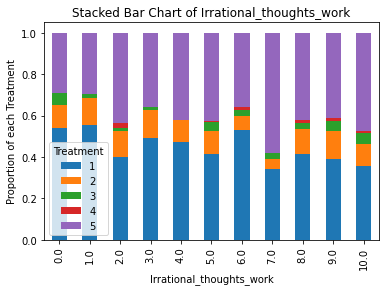

In [24]:
# Analysis for Irrational Thoughts Work
crosstab = pd.crosstab(data.Irrational_thoughts_work,data.Treatment).plot(kind='bar')
plt.title('Irrational_thoughts_work Analysis')
plt.xlabel('Irrational_thoughts_work')
plt.ylabel('Treatment')
plt.show()

table=pd.crosstab(data.Irrational_thoughts_work,data.Treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Irrational_thoughts_work')
plt.ylabel('Proportion of each Treatment')
plt.show()

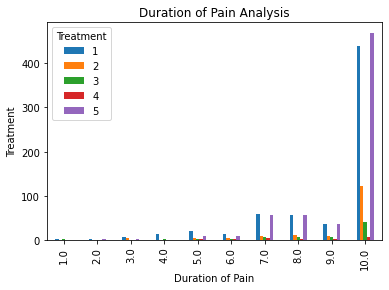

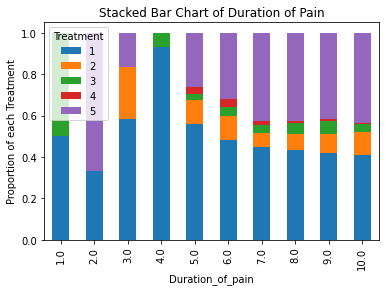

In [9]:
# Analysis for Duration of Pain
crosstab = pd.crosstab(data.Duration_of_pain,data.Treatment).plot(kind='bar')
plt.title('Duration of Pain Analysis')
plt.xlabel('Duration of Pain')
plt.ylabel('Treatment')
plt.show()

table=pd.crosstab(data.Duration_of_pain,data.Treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Duration of Pain')
plt.ylabel('Proportion of each Treatment')
plt.show()

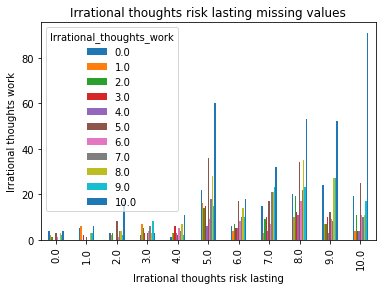

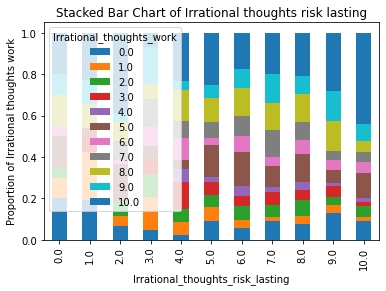

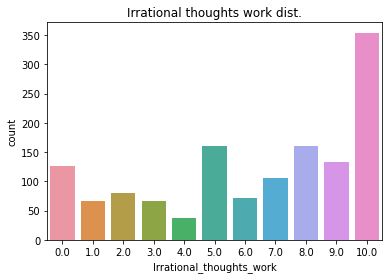

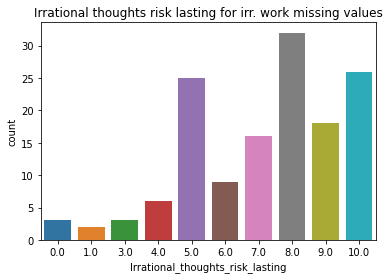

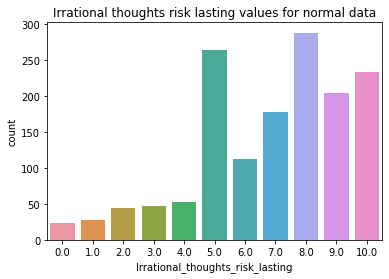

In [16]:
# Analysis for Irrational thoughts risk lasting missing values
crosstab = pd.crosstab(data.Irrational_thoughts_risk_lasting,data.Irrational_thoughts_work).plot(kind='bar')
plt.title('Irrational thoughts risk lasting per work')
plt.xlabel('Irrational thoughts risk lasting')
plt.ylabel('Irrational thoughts work')
plt.show()

table=pd.crosstab(data.Irrational_thoughts_risk_lasting,data.Irrational_thoughts_work)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Irrational thoughts risk lasting')
plt.ylabel('Proportion of Irrational thoughts work')
plt.show()

pd.options.display.max_columns = 500
missingRisk = data.loc[data.Irrational_thoughts_work.isna()]

#missingRisk.fillna('Missing')
sns.countplot(x='Irrational_thoughts_work',data = data)
plt.title('Irrational thoughts work dist.')
plt.show()

sns.countplot(x='Irrational_thoughts_risk_lasting',data = missingRisk)
plt.title('Irrational thoughts risk lasting for irr. work missing values')
plt.show()

sns.countplot(x='Irrational_thoughts_risk_lasting',data = data)
plt.title('Irrational thoughts risk lasting values for normal data')
plt.show()

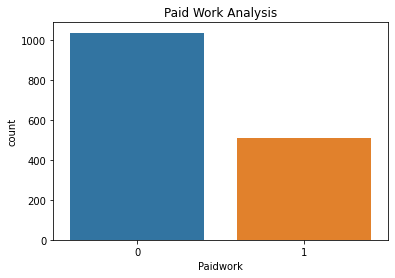

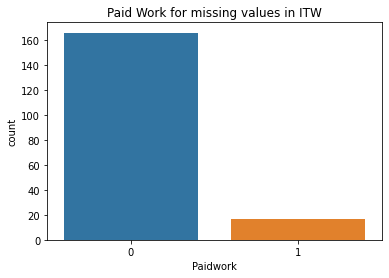

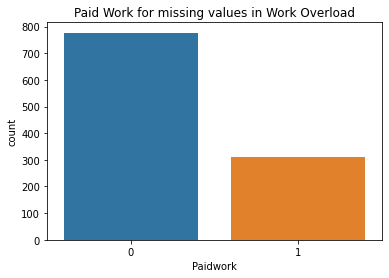

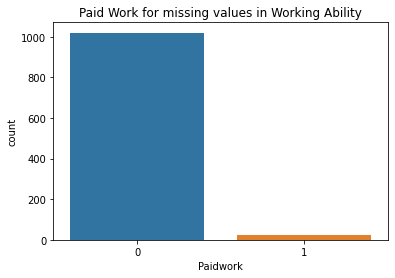

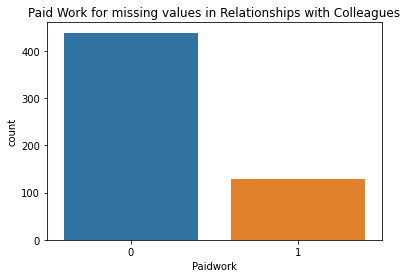

In [14]:
# Analyse class distribution
sns.countplot(x='Paidwork',data = data)
plt.title('Paid Work Analysis')
plt.show()

missingITW = data.loc[data.Irrational_thoughts_work.isna()]
missingWorkOverload = data.loc[data.Workoverload.isna()]
missingRelationships = data.loc[data.Relationship_with_colleagues.isna()]
missingWorkingAbility = data.loc[data.working_ability.isna()]

sns.countplot(x='Paidwork',data = missingITW)
plt.title('Paid Work for missing values in ITW')
plt.show()

sns.countplot(x='Paidwork',data = missingWorkOverload)
plt.title('Paid Work for missing values in Work Overload')
plt.show()

sns.countplot(x='Paidwork',data = missingWorkingAbility)
plt.title('Paid Work for missing values in Working Ability')
plt.show()

sns.countplot(x='Paidwork',data = missingRelationships)
plt.title('Paid Work for missing values in Relationships with Colleagues')
plt.show()

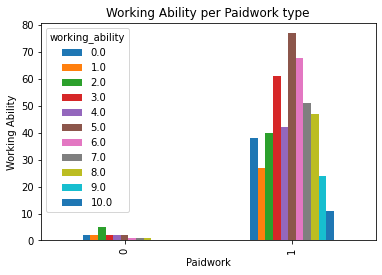

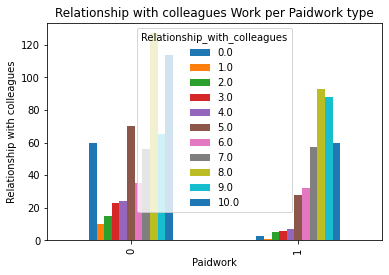

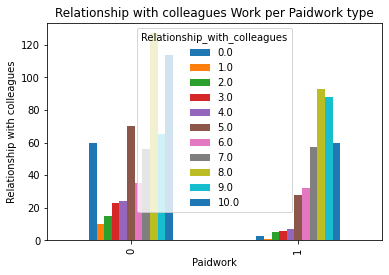

In [18]:
crosstab = pd.crosstab(data.Paidwork,data.working_ability).plot(kind='bar')
plt.title('Working Ability per Paidwork type')
plt.xlabel('Paidwork')
plt.ylabel('Working')
plt.show()

crosstab = pd.crosstab(data.Paidwork,data.Relationship_with_colleagues).plot(kind='bar')
plt.title('Relationship with colleagues Work per Paidwork type')
plt.xlabel('Paidwork')
plt.ylabel('Relationship with colleagues')
plt.show()

crosstab = pd.crosstab(data.Paidwork,data.Relationship_with_colleagues).plot(kind='bar')
plt.title('Relationship with colleagues Work per Paidwork type')
plt.xlabel('Paidwork')
plt.ylabel('Relationship with colleagues')
plt.show()